In [47]:
import ffn
%matplotlib inline
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import pickle
import io

In [13]:
import talib
from talib import MA_Type
import requests

In [103]:
# 讀出預先下載好的股價資料
with open('stockdata', 'rb') as f:
    data = pickle.load(file=f)

# Q1. 畫出 Diamond Shape

In [11]:
def pyramid(n):
    for i in range(n):                       
        for j in range(n - i - 1):           
                 print(" ", end = "")
        for k in range(i + 1):                
                print("* ", end = "" )
        print() 
    for i in range(n):                       
        for j in range(i + 1):            
                 print(" ", end = "")
        for k in range(n - i - 1):                
                print("* ", end = "" )
        print()                               

In [14]:
pyramid(8)

       * 
      * * 
     * * * 
    * * * * 
   * * * * * 
  * * * * * * 
 * * * * * * * 
* * * * * * * * 
 * * * * * * * 
  * * * * * * 
   * * * * * 
    * * * * 
     * * * 
      * * 
       * 
        


# Q2. 刪除重複性資料

從 symbols01.txt 跟 symbols02.txt 讀入兩組股票代號，合併兩組代號，輸出一份無重複的股票代號到 symbols03.txt。

In [25]:
with open("symbols01.txt") as file:
        Symbols01 = file.read()
        Symbols01=set(Symbols01.strip().split("\n"))
with open("symbols02.txt") as file:
        Symbols02=file.read()
        Symbols02=set(Symbols02.strip().split("\n"))

In [27]:
Symbols03=list(Symbols01 or Symbols02)

In [28]:
Symbols03

['DNBF',
 'GRVY',
 'LARK',
 'CNACU',
 'CRIS',
 'ESSA',
 'MNTX',
 'TRCB',
 'IOTS',
 'LSBK',
 'PNRG',
 'HYGS',
 'CBFV',
 'PCTI',
 'SSC',
 'CLSD',
 'BRQS',
 'SALM',
 'FSFG',
 'CYBE',
 'PIO',
 'ADXS',
 'ABDC',
 'KCAP',
 'VCEL',
 'RARX',
 'CWCO',
 'DRRX',
 'LQDT',
 'ALSK',
 'REPH',
 'ALDX',
 'PHII',
 'DWSN',
 'FCAP',
 'KVHI',
 'USLB',
 'BANX',
 'UGLD',
 'METC',
 'FTD',
 'HAIR',
 'VUZI',
 'PBIP',
 'MGEN',
 'EKSO',
 'COOL',
 'IVAC',
 'BYBK',
 'IDLB',
 'VTWV',
 'SRNE',
 'PRN',
 'ELEC',
 'ESQ',
 'INSG',
 'HBIO',
 'PCYO',
 'ALPN',
 'PTF',
 'TUES',
 'ESGE',
 'USAP',
 'PTH',
 'EBMT',
 'RGCO',
 'CFMS',
 'MOXC',
 'AUTO',
 'CDNA',
 'ESES',
 'IGLD',
 'WMIH',
 'GNMA',
 'ADRE',
 'INSE',
 'ZLAB',
 'HALL',
 'III',
 'EIGR',
 'OBLN',
 'CBMG',
 'FCCY',
 'NHTC',
 'PEBK',
 'XONE',
 'OVLY',
 'FUND',
 'TNTR',
 'UTSI',
 'FENC',
 'DTEA',
 'GPAC',
 'MACK',
 'EMKR',
 'CECE',
 'CTIC',
 'CTSO',
 'DZSI',
 'FTGC',
 'WATT',
 'TA',
 'VBLT',
 'GRIF',
 'OMED',
 'GSIT',
 'MEET',
 'PSTI',
 'TRIB',
 'LIFE',
 'PCOM',
 'DAIO',
 

In [29]:
with open('symbols03.txt','w') as file:
    for symbol in Symbols03:
        file.write(symbol.strip().upper()+"\n")

# Q3. 下載台灣上市公司基本資料

寫一個程式從 [http://dts.twse.com.tw/opendata/t187ap03_L.csv](http://dts.twse.com.tw/opendata/t187ap03_L.csv) 下載台灣上市公司基本資料，並輸出成 pandas dataframe。

In [95]:
r = requests.get("http://dts.twse.com.tw/opendata/t187ap03_L.csv")
r.encoding="big5"

In [98]:
twse = r.text.split("\r\n")

In [99]:
twse = io.StringIO(r.text)

In [101]:
TWSE = pd.read_csv(twse, skiprows=1,index_col=False)

In [102]:
TWSE

,公司代號,公司名稱,產業別,住址,營利事業統一編號,董事長,總經理,發言人,發言人職稱,代理發言人,...,特別股,編制財務報表類型,股票過戶機構,過戶電話,過戶地址,英文簡稱,英文通訊地址,傳真機號碼,電子郵件信箱,網址
0,1101,台灣水泥股份有限公司,水泥工業,台北市中山北路2段113號,11913502.0,張安平,李鐘培,黃健強,資深副總經理,蔡立文,...,0.0,1.0,中國信託商業銀行代理部,66365566,台北市重慶南路一段83號5樓,TCC,"No.113, Sec.2, Zhongshan N. Rd.,Taipei City 10...",(02)2531-6529,finance@taiwancement.com,http://www.taiwancement.com
1,1102,亞洲水泥股份有限公司,水泥工業,台北市大安區敦化南路2段207號30、31樓,3244509.0,徐旭東,李坤炎,周維崑,副總經理,吳玲綾,...,0.0,1.0,亞東證券股份有限公司,02-2361-8608,台北市重慶南路一段86號3樓,ACC,"30TH FLOOR,TAIPEI METRO TOWER,207.TUN HWA SOUT...",02-2378-5191,service@acc.com.tw,www.acc.com.tw
2,1103,嘉新水泥股份有限公司,水泥工業,台北市中山北路2段96號,11892801.0,張剛綸,祁士鉅,王立心,執行副總經理,余曉芸,...,0.0,1.0,群益金鼎證券股份有限公司股代部,(02)2702-3999,台北市敦化南路2段97號地下2樓,CHC,"No.96, Sec. 2, Zhongshan N. Rd., Zhongshan Dis...",(02)2511-4002,investor-relations@chcgroup.com.tw,www.chcgroup.com.tw
3,1104,環球水泥股份有限公司,水泥工業,台北市南京東路二段125號10樓,7568009.0,侯博義,侯博義,楊宗仁,經理,詹志鴻,...,0.0,1.0,凱基證券股份有限公司股務代理部,02-23892999,﹝100﹞台北市重慶南路一段2號5樓,UCC,"10th F1., 125 Nanking E.Rd Sec. 2,Taipei Taiwan",02-25075870,ucc@ucctw.com,www.ucctw.com
4,1108,幸福水泥股份有限公司,水泥工業,台北市松江路237號15樓,40601248.0,陳兩傳,陳兩傳,溫秀菊,財務部經理,陳一誠,...,0.0,1.0,永豐金證券股務代理,2381-6288,台北市中正區博愛路17號3樓,LUCKY CEMENT,"15TH FL.,NO.237,SUNG KIANG RD.,TAIPEI,TAIWAN,R...",25048672,"wendy@luckygrp,com.tw",www.luckygrp.com.tw
5,1109,信大水泥股份有限公司,水泥工業,台北市寶慶路37號7樓,3279507.0,楊智雄,楊智雄,吳連富,副總經理,林坤榮,...,0.0,1.0,中國信託商業銀行代理部,(02)6636-5566,台北巿重慶南路一段83號5樓,HsingTa,"7TH FL.,No.37 Pao Ching RoadTaipei Taiwan R.O.C.",23314086,service@hsingta.com.tw,www.hsingta.com.tw
6,1110,東南水泥股份有限公司,水泥工業,高雄市前金區五福三路21號4樓之1,83078600.0,陳敏斷,吳長直,黃薪翰,財務部經理,唐榮宗,...,0.0,1.0,元大證券股份有限公司,02-25865859,台北市承德路三段210號地下室1樓,TUNA CEMENT,"NO.21 Wu Fu 3 RoadKaohsiung, Taiwan, R.O.C.",07-9505895,southeast@secement.com,www.southeastcement.com.tw
7,1201,味全食品工業股份有限公司,食品工業,台北市松江路125號,11347802.0,陳永清,蘇守斌,張美凰,財務長,─,...,0.0,1.0,元大證券股務代理部,(02)25865859,台北市大同區承德路3段210號地下一樓,Wei Chuan,"10F., No.125, Sung Chiang Rd.Taipei, Taiwan(R....",(02)25063182,service@weichuan.com.tw,http://www.weichuan.com.tw
8,1203,味王股份有限公司,食品工業,台北市中山北路二段79號5樓,7067309.0,陳清福,陳恭平,魏璟雄,經理,李兆弘,...,0.0,1.0,群益金鼎證券股份有限公司,27023999,台北市敦化南路二段97號地下2樓,VE WONG,"5TH FL., 79 CHUNG SHAN N. RD., SEC.2TAIPEI TAIWAN",(02)25811006,wei@vewong.com.tw,http://www.vewong.com
9,1210,大成長城企業股份有限公司,食品工業,台南市永康區蔦松二街三號,73008303.0,韓家宇,莊坤炎,周叔恆,特助,常岡德,...,0.0,1.0,中國信託商業銀行代理部,02-66365566,台北市重慶南路一段八十三號六樓,GREATWALL,3 NIAOSUN 2TH STREETYONGKONG TAINAN CONTY TAIWAN,06-2534596,john@greatwall-group.com,http://www.dachan.com


# Q4. 畫出技術曲線
請畫出除了上課提過的線型之外的任何技術曲線，並寫註解說明。

In [150]:
import talib

In [151]:
from talib import MA_Type
upper, middle, lower = talib.BBANDS(df['Close'].values, matype=MA_Type.T3)

In [152]:
df = data['GOOG']

In [153]:
df

,Open,High,Low,Close,Adj Close,Volume,UBB,MBB,LBB
Date,,,,,,,,,
2015-12-31,769.500000,769.500000,758.340027,758.880005,758.880005,1500900,NaN,NaN,NaN
2016-01-04,743.000000,744.059998,731.257996,741.840027,741.840027,3272800,NaN,NaN,NaN
2016-01-05,746.450012,752.000000,738.640015,742.580017,742.580017,1950700,NaN,NaN,NaN
2016-01-06,730.000000,747.179993,728.919983,743.619995,743.619995,1947000,NaN,NaN,NaN
2016-01-07,730.309998,738.500000,719.059998,726.390015,726.390015,2963700,NaN,NaN,NaN
2016-01-08,731.450012,733.229980,713.000000,714.469971,714.469971,2450900,NaN,NaN,NaN
2016-01-11,716.609985,718.854980,703.539978,716.030029,716.030029,2089300,NaN,NaN,NaN
2016-01-12,721.679993,728.750000,717.317017,726.070007,726.070007,2024500,NaN,NaN,NaN
2016-01-13,730.849976,734.739990,698.609985,700.559998,700.559998,2501700,NaN,NaN,NaN


In [154]:
df['UBB'] = upper

In [155]:
df['MBB'] = middle

In [156]:
df['LBB'] = lower

In [157]:
%matplotlib inline

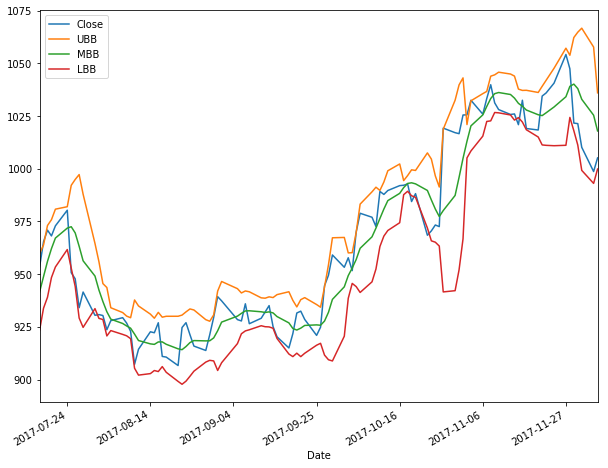

In [161]:
df[['Close', 'UBB', 'MBB', 'LBB']][-100:].plot(legend='best',figsize=(10, 8))

# Q5. 策略回測

In [164]:
# 計算 MaxDD
def DrawDownAnalysis(cumRet):
    dd_series = ffn.core.to_drawdown_series(cumRet)
    dd_details = ffn.core.drawdown_details(dd_series)
    return dd_details['drawdown'].min(), dd_details['days'].max()

In [165]:
# 利用策略產生的持有部位資訊，計算底下四個指標來判斷投資績效
# sharpe ratio: 判斷報酬的好壞跟穩定度，數值越大越好
# maxdd: maximum drawdown, 最糟糕的狀況會賠幾 %
# maxddd: maximum drawdown duration, 低於上一次最高報酬的天數
# cumRet[-1]: 最後賺的 % 數

def indicators(df):
    dailyRet = df['Close'].pct_change()
    excessRet = (dailyRet - 0.04/252)[df['positions'] == 1]
    SharpeRatio = np.sqrt(252.0)*np.mean(excessRet)/np.std(excessRet)
    
    cumRet = np.cumprod(1+excessRet)
    
    maxdd, maxddd = DrawDownAnalysis(cumRet)
    
    return SharpeRatio, maxdd, maxddd, cumRet[-1]

In [166]:
# 這是我們的策略的部分
# 主要只是要算出進出的訊號 signals 跟何時持有部位 positions
# 底下是一個突破系統的範例

def Breakout_strategy(df):
    # Donchian Channel
    df['20d_high'] = np.round(pd.Series.rolling(df['Close'], window=20).max(), 2)
    df['10d_low'] = np.round(pd.Series.rolling(df['Close'], window=10).min(), 2)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] > df['20d_high'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] < df['10d_low'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [167]:
def RSI_7030_strategy(df):
    df['RSI'] = talib.RSI(df['Close'].values)
    
    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['RSI'][t-1] < 30:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['RSI'][t-1] > 70:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [168]:
def BBands_strategy(df):
    df['UBB'], df['MBB'], df['LBB'] = talib.BBANDS(df['Close'].values, matype=MA_Type.T3)
    df[]
    
    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] < df['LBB'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] > df['UBB'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [169]:
#策略:
#今日收盤價小於前日BBand下限且20日均線大於60日均線時進場,
#今日收盤價大於前日BBand下限且20日均線小於60日均線時出場。

def M064810006_strategy(df):
    df['UBB'], df['MBB'], df['LBB'] = talib.BBANDS(df['Close'].values, matype=MA_Type.T3)
    df['20d'] = pd.Series.rolling(df['Close'], window=20).mean()
    df['60d'] = pd.Series.rolling(df['Close'], window=60).mean()
    
    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] < df['LBB'][t-1] and df['20d'][t] > df['60d'][t]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] > df['UBB'][t-1] and df['20d'][t] < df['60d'][t]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [170]:
def apply_strategy(strategy, df):
    return strategy(df)

In [172]:
# 計算各支股票的回測結果
results = []

#strategies = [Breakout_strategy, RSI_7030_strategy, BBands_strategy, M064810006_strategy]
strategies = [Breakout_strategy, RSI_7030_strategy, BBands_strategy, M064810006_strategy]

for symbol in data:
    for strategy in strategies:
        try:
            apply_strategy(strategy, data[symbol])
            if np.all(data[symbol]['signals']==0):
                print("Symbol:", symbol, "使用", strategy.__name__, "策略沒有出現買賣訊號。")
                continue
            SharpeRatio, maxdd, maxddd, finalRet = indicators(data[symbol])
            days = (data[symbol].index[-1] - data[symbol].index[0]).days
            results.append((SharpeRatio, maxdd, maxddd, finalRet, days,
                            data[symbol][data[symbol]['signals'] > 0]['signals'].sum(), symbol, strategy.__name__))
        except Exception as e:
            print("Error occurs at symbol:", symbol, "Strategy:", strategy.__name__, "==>", e.args)

In [173]:
results_df = pd.DataFrame(results, columns=['sharpe','MaxDrawDown','MaxDrawDownDuration','returns', 
                                            'days', 'entries','symbol','strategy'])

In [175]:
results_df.head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
0,0.131503,-0.208296,281,0.995734,705,11,TICC,Breakout_strategy
1,0.395515,-0.244817,482,1.077756,705,2,TICC,RSI_7030_strategy
2,0.102787,-0.231763,426,0.984521,705,20,TICC,BBands_strategy
3,0.547986,-0.271219,260,1.111788,705,3,TICC,M064810006_strategy
4,1.365570,-0.361485,299,1.631388,705,12,TWIN,Breakout_strategy


In [176]:
results_df.sort_values('MaxDrawDown',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
73,6.306176,-0.003654,122,1.028222,473,3,LCA,RSI_7030_strategy
17,10.243474,-0.006251,3,1.132402,705,1,GOOG,RSI_7030_strategy
74,2.038551,-0.013673,119,1.060527,473,16,LCA,BBands_strategy
66,1.085572,-0.023454,135,1.049505,384,12,SCAC,BBands_strategy
36,3.040178,-0.023844,58,1.073352,203,3,CSML,Breakout_strategy


In [177]:
results_df.sort_values('returns',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
9,2.013777,-0.219296,167,2.477803,705,4,AMOT,RSI_7030_strategy
14,2.062962,-0.286661,113,2.422460,705,22,CDZI,BBands_strategy
78,2.136744,-0.454342,191,2.400221,705,21,BBGI,BBands_strategy
27,2.110114,-0.157591,138,2.228882,705,3,RICK,M064810006_strategy
5,2.424484,-0.169115,115,2.151881,705,3,TWIN,RSI_7030_strategy
